In [1]:
import ccxt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import tz
import matplotlib.pyplot as plt

import json
import time
import os
import sys

In [2]:
src_path = '../src/'
sys.path.append(os.path.abspath(src_path))
import func_get
import func_signal
import func_backtest

In [3]:
start_ts = time.time()

In [4]:
interval_dict = {
    '1m': 1,
    '5m': 5,
    '15m': 15,
    '30m': 30,
    '1h': 60,
    '2h': 120,
    '4h': 240,
    '1d': 1440
}

In [5]:
with open('../../../_keys/ftx/ftx_read_keys.json') as keys_file:
    keys_dict = json.load(keys_file)
    
exchange = ccxt.ftx({'apiKey': keys_dict['apiKey'],
                     'secret': keys_dict['secret'],
                     'enableRateLimit': True})

### Config

In [6]:
project_name = 'messi'

In [7]:
start_date = dt.datetime(2022, 1, 1)
start_hour = 1
end_date = dt.datetime.today() - dt.timedelta(days=1)
reinvest_profit_flag = True

In [8]:
config_params = {
    'safety_ohlcv_range': 1000,
    'action_timeframe': '2h',
    'target_side': ['buy', 'sell'],
    'base': {
        'symbol': ['ETH-PERP'],
        'open': {
            '2h': {
                'tma': {
                    'check': ['check_signal_side_change'],
                    'look_back': 1,
                    'windows': 50,
                    'revert': False
                }
            }
        },
        'close': {
            '2h': {
                'tma': {
                    'check': ['check_signal_side'],
                    'look_back': 1,
                    'windows': 50,
                    'revert': False
                }
            }
        }
    },
    'lead': {
        'symbol': [],
        'open': {
        },
        'close': {
        }
    },
    'tp': {
        'stop_percent': 100,
        'price_percent': None,
        'signal': None,
    },
    'sl': {
        'stop_percent': 100,
        'price_percent': None,
        'signal': None
    },
    'action_percent': 100,
    'leverage': 1,
    'taker_fee_percent': 0.07
}

### Get data

In [9]:
ohlcv_df_dict = func_get.get_data(exchange, start_date, end_date, start_hour, interval_dict, config_params)

base: timeframe 1/1 symbol 1/1 date 1/286
base: timeframe 1/1 symbol 1/1 date 2/286
base: timeframe 1/1 symbol 1/1 date 3/286
base: timeframe 1/1 symbol 1/1 date 4/286
base: timeframe 1/1 symbol 1/1 date 5/286
base: timeframe 1/1 symbol 1/1 date 6/286
base: timeframe 1/1 symbol 1/1 date 7/286
base: timeframe 1/1 symbol 1/1 date 8/286
base: timeframe 1/1 symbol 1/1 date 9/286
base: timeframe 1/1 symbol 1/1 date 10/286
base: timeframe 1/1 symbol 1/1 date 11/286
base: timeframe 1/1 symbol 1/1 date 12/286
base: timeframe 1/1 symbol 1/1 date 13/286
base: timeframe 1/1 symbol 1/1 date 14/286
base: timeframe 1/1 symbol 1/1 date 15/286
base: timeframe 1/1 symbol 1/1 date 16/286
base: timeframe 1/1 symbol 1/1 date 17/286
base: timeframe 1/1 symbol 1/1 date 18/286
base: timeframe 1/1 symbol 1/1 date 19/286
base: timeframe 1/1 symbol 1/1 date 20/286
base: timeframe 1/1 symbol 1/1 date 21/286
base: timeframe 1/1 symbol 1/1 date 22/286
base: timeframe 1/1 symbol 1/1 date 23/286
base: timeframe 1/1 

base: timeframe 1/1 symbol 1/1 date 191/286
base: timeframe 1/1 symbol 1/1 date 192/286
base: timeframe 1/1 symbol 1/1 date 193/286
base: timeframe 1/1 symbol 1/1 date 194/286
base: timeframe 1/1 symbol 1/1 date 195/286
base: timeframe 1/1 symbol 1/1 date 196/286
base: timeframe 1/1 symbol 1/1 date 197/286
base: timeframe 1/1 symbol 1/1 date 198/286
base: timeframe 1/1 symbol 1/1 date 199/286
base: timeframe 1/1 symbol 1/1 date 200/286
base: timeframe 1/1 symbol 1/1 date 201/286
base: timeframe 1/1 symbol 1/1 date 202/286
base: timeframe 1/1 symbol 1/1 date 203/286
base: timeframe 1/1 symbol 1/1 date 204/286
base: timeframe 1/1 symbol 1/1 date 205/286
base: timeframe 1/1 symbol 1/1 date 206/286
base: timeframe 1/1 symbol 1/1 date 207/286
base: timeframe 1/1 symbol 1/1 date 208/286
base: timeframe 1/1 symbol 1/1 date 209/286
base: timeframe 1/1 symbol 1/1 date 210/286
base: timeframe 1/1 symbol 1/1 date 211/286
base: timeframe 1/1 symbol 1/1 date 212/286
base: timeframe 1/1 symbol 1/1 d

### Add signal

In [10]:
ohlcv_df_dict = func_signal.add_signal(start_date, ohlcv_df_dict, interval_dict, config_params)

base add tma to ETH-PERP 2h


### Back test

In [11]:
action_time_list = func_get.gen_action_time_list(config_params, ohlcv_df_dict)
max_open_timeframe = func_backtest.get_max_open_timeframe(config_params, interval_dict)

In [12]:
budget = 100

transaction_dict = {
    'symbol': [],
    'side': [],
    'amount': [],
    'open_time': [],
    'open_price': [],
    'close_time': [],
    'close_price': [],
    'value': [],
    'notional': [],
    'profit': [],
    'profit_percent': []
}

position_dict = {}

if reinvest_profit_flag == True:
    budget_dict = {
        'time': [],
        'budget': []
    }
    
max_drawdown = 0

In [13]:
if reinvest_profit_flag == True:
    min_budget = budget

time_count = 0

for signal_time in action_time_list:
    action_time = signal_time + dt.timedelta(minutes=interval_dict[config_params['action_timeframe']])
    
    time_count += 1
    print(f"Time {action_time}: progress {time_count}/{len(action_time_list)}")

    '''
    Close positions
    '''
    for symbol in [x for x in position_dict.keys()]:
        print(f"  {symbol}")
        budget, max_drawdown, position_dict, transaction_dict = func_backtest.close_position(symbol, signal_time, max_drawdown, config_params, budget, reinvest_profit_flag, ohlcv_df_dict, position_dict, transaction_dict, interval_dict)

    '''
    Open positions
    '''
    max_position = int(1 / (config_params['action_percent'] / 100))

    for symbol in [x for x in config_params['base']['symbol'] if x not in position_dict.keys()][:max_position]:
        print(f"  {symbol}")
        position_dict = func_backtest.open_position(symbol, signal_time, max_open_timeframe, config_params, budget, ohlcv_df_dict, position_dict, interval_dict)    
    
    '''
    Update budget
    '''
    if reinvest_profit_flag == True:
        budget_dict['time'].append(signal_time)
        budget_dict['budget'].append(budget)

        if budget < min_budget:
            min_budget = budget

    if budget <= 0:
        print(f"Out of money at {action_time}")
        break
        
'''
Clear final position
'''
opened_symbol = list(position_dict.keys())

for symbol in opened_symbol:
    print(f" Clear {symbol} position")
    
    side = position_dict[symbol]['side']
    ohlcv_df = ohlcv_df_dict['base'][config_params['action_timeframe']][symbol]
    current_ohlcv_df = ohlcv_df[ohlcv_df['time'] == signal_time].reset_index(drop=True)
    close_price = current_ohlcv_df.loc[0, 'close']
    close_percent = 100
    
    budget, position_dict, transaction_dict = func_backtest.update_close_position(symbol, side, close_price, close_percent, signal_time, config_params, budget, reinvest_profit_flag, position_dict, transaction_dict, interval_dict)

Time 2022-01-01 03:00:00: progress 1/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 05:00:00: progress 2/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 07:00:00: progress 3/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 09:00:00: progress 4/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 11:00:00: progress 5/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 13:00:00: progress 6/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 15:00:00: progress 7/1428
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: no_action
     No action
Time 2022-01-01 17:00:00: progress 8/1428
  ETH-PERP
     base ETH-PERP check_signal_side_

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-20 03:00:00: progress 229/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-20 05:00:00: progress 230/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-20 07:00:00: progress 231/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-20 09:00:00: progress 232/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-20 11:00:00: progress 233/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-20 13:00:00: progress 234/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-20 15:00:00: progress 235/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-01-20 17:00:00: progress 236/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-07 23:00:00: progress 455/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-08 01:00:00: progress 456/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-08 03:00:00: progress 457/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-08 05:00:00: progress 458/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-08 07:00:00: progress 459/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-08 09:00:00: progress 460/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-08 11:00:00: progress 461/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-02-08 13:00:00: progress 462/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-14 09:00:00: progress 532/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-14 11:00:00: progress 533/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-14 13:00:00: progress 534/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-14 15:00:00: progress 535/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-14 17:00:00: progress 536/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-14 19:00:00: progress 537/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-14 21:00:00: progress 538/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-02-14 23:00:00: progress 539/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma

     Not close
Time 2022-03-01 09:00:00: progress 712/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-01 11:00:00: progress 713/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-01 13:00:00: progress 714/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-01 15:00:00: progress 715/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-01 17:00:00: progress 716/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-01 19:00:00: progress 717/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-01 21:00:00: progress 718/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-01 23:00:00: progress 719/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-02 01:00:00: progres

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-07 13:00:00: progress 786/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-07 15:00:00: progress 787/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-07 17:00:00: progress 788/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-07 19:00:00: progress 789/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-07 21:00:00: progress 790/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-07 23:00:00: progress 791/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-08 01:00:00: progress 792/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-08 03:00:00: progress 793/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-21 13:00:00: progress 954/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-21 15:00:00: progress 955/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-03-21 17:00:00: progress 956/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Closed by signal at 2914.3
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: buy
     buy: 0.04228388645200367
     price: 2914.3
     tp: inf
     sl: 0
Time 2022-03-21 19:00:00: progress 957/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-21 21:00:00: progress 958/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-21 23:00:00: progress 959/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-22 01:00:00: progress 960/1428
  ETH-PERP
     ba

     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-27 09:00:00: progress 1024/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-27 11:00:00: progress 1025/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-27 13:00:00: progress 1026/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-27 15:00:00: progress 1027/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-27 17:00:00: progress 1028/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-27 19:00:00: progress 1029/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-27 21:00:00: progress 1030/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-03-27 23:00:00: progress 1031/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-11 13:00:00: progress 1206/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-11 15:00:00: progress 1207/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-11 17:00:00: progress 1208/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-11 19:00:00: progress 1209/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-11 21:00:00: progress 1210/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-11 23:00:00: progress 1211/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-12 01:00:00: progress 1212/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-12 03:00:00: progress 1213/1428
  ETH-PERP
     base ETH-PERP check_signal_

     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-17 15:00:00: progress 1279/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: sell
     Not close
Time 2022-04-17 17:00:00: progress 1280/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Closed by signal at 3043.0
  ETH-PERP
     base ETH-PERP check_signal_side_change tma 2h: buy
     buy: 0.04223235892638805
     price: 3043.0
     tp: inf
     sl: 0
Time 2022-04-17 19:00:00: progress 1281/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-17 21:00:00: progress 1282/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-17 23:00:00: progress 1283/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-18 01:00:00: progress 1284/1428
  ETH-PERP
     base ETH-PERP check_signal_side tma 2h: buy
     Not close
Time 2022-04-18 03:00:00: progress 1285/1428
  ETH-PERP
 

In [14]:
end_ts = time.time()
time_process = end_ts - start_ts
print(f"Time process: {round(time_process / 60, 2)} minutes")

Time process: 0.95 minutes


### Result

In [15]:
transaction_df = pd.DataFrame(transaction_dict)
transaction_df.to_csv(f'transactions/{project_name}.csv', index=False)
transaction_df

,symbol,side,amount,open_time,open_price,close_time,close_price,value,notional,profit,profit_percent
0,ETH-PERP,buy,0.026592,2022-01-02 01:00:00,3760.6,2022-01-04 03:00:00,3738.5,100.000000,100.000000,-0.727261,-0.726752
1,ETH-PERP,sell,0.026554,2022-01-04 03:00:00,3738.5,2022-01-04 07:00:00,3765.0,99.272739,99.272739,-0.843160,-0.849932
2,ETH-PERP,buy,0.026143,2022-01-04 07:00:00,3765.0,2022-01-04 09:00:00,3732.2,98.429579,98.429579,-0.994702,-1.009865
3,ETH-PERP,sell,0.026107,2022-01-04 09:00:00,3732.2,2022-01-04 15:00:00,3763.8,97.434878,97.434878,-0.961953,-0.987970
4,ETH-PERP,buy,0.025632,2022-01-04 15:00:00,3763.8,2022-01-06 01:00:00,3773.1,96.472924,96.472924,0.103147,0.106843
...,...,...,...,...,...,...,...,...,...,...,...
67,ETH-PERP,sell,0.040742,2022-04-26 23:00:00,2859.8,2022-04-28 17:00:00,2941.3,116.514193,116.514193,-3.485924,-2.993940
68,ETH-PERP,buy,0.038428,2022-04-28 17:00:00,2941.3,2022-04-28 21:00:00,2870.2,113.028270,113.028270,-2.888558,-2.553819
69,ETH-PERP,sell,0.038374,2022-04-28 21:00:00,2870.2,2022-04-29 01:00:00,2972.1,110.139712,110.139712,-4.067196,-3.695347
70,ETH-PERP,buy,0.035689,2022-04-29 01:00:00,2972.1,2022-04-29 17:00:00,2879.8,106.072516,106.072516,-3.440329,-3.241106


In [16]:
if reinvest_profit_flag == True:
    print(f"Final budget: {round(budget, 2)}")
else:
    print("Not reinvest profit")

Final budget: 104.53


In [17]:
if reinvest_profit_flag == True:
    return_percent = (budget_dict['budget'][-1] - budget_dict['budget'][0]) / budget_dict['budget'][0] * 100
    print(f"Return: {round(return_percent, 2)}%")
else:
    print("Not reinvest profit")

Return: 2.63%


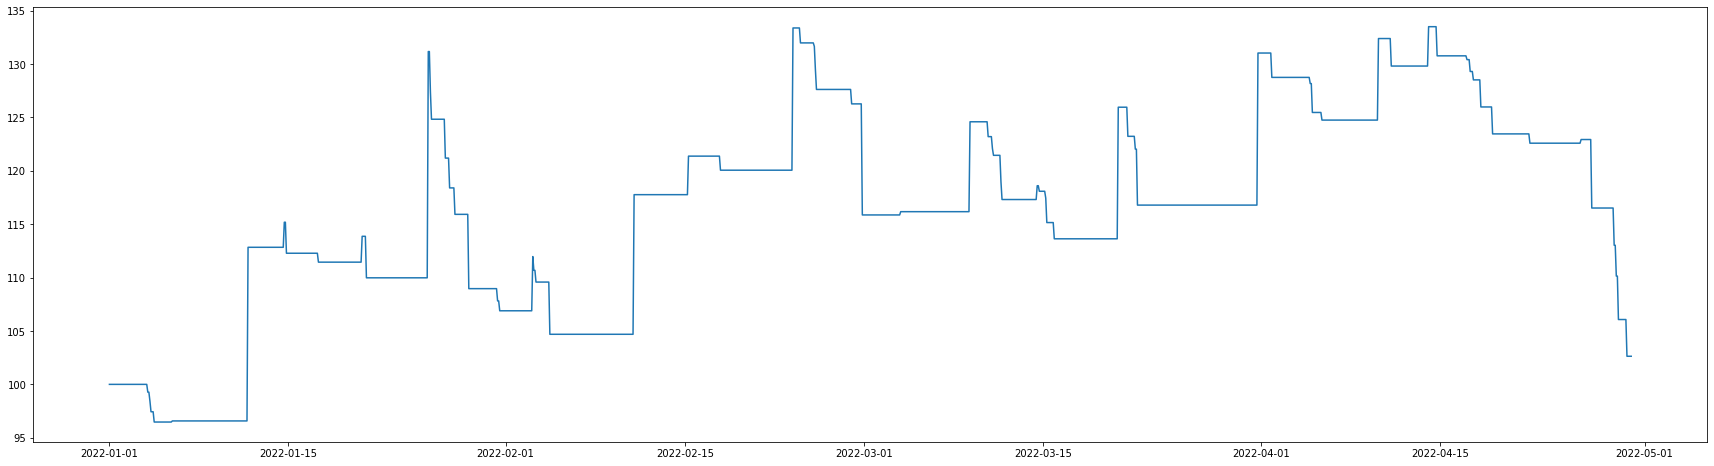

In [18]:
if reinvest_profit_flag == True:
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.plot(budget_dict['time'], budget_dict['budget'])
else:
    print("Not reinvest profit")

In [19]:
if reinvest_profit_flag == True:
    print(f"Max drawdown: {round(max_drawdown * 100, 2)}%")

Max drawdown: 8.09%


In [20]:
win_rate = len(transaction_df[transaction_df['profit'] > 0]) / len(transaction_df)
print(f"Win rate: {round(win_rate * 100, 2)}%")

Win rate: 25.0%


In [21]:
for symbol in transaction_df['symbol'].unique():
    symbol_df = transaction_df[transaction_df['symbol'] == symbol]
    win_rate = len(symbol_df[symbol_df['profit'] > 0]) / len(symbol_df)
    print(f"{symbol} win rate: {round(win_rate * 100, 2)}%")

ETH-PERP win rate: 25.0%


In [22]:
print(f"Distribution")
print(pd.DataFrame(transaction_df['profit_percent'].describe()))

Distribution
       profit_percent
count       72.000000
mean         0.170032
std          4.838327
min         -8.243055
25%         -2.043458
50%         -1.001397
75%         -0.158198
max         19.280460


In [23]:
for symbol in transaction_df['symbol'].unique():
    temp_return = transaction_df[transaction_df['symbol'] == symbol]['profit_percent']
    
    print(f"Distribution {symbol}:")
    print(pd.DataFrame(temp_return.describe()))
    print("\n")

Distribution ETH-PERP:
       profit_percent
count       72.000000
mean         0.170032
std          4.838327
min         -8.243055
25%         -2.043458
50%         -1.001397
75%         -0.158198
max         19.280460




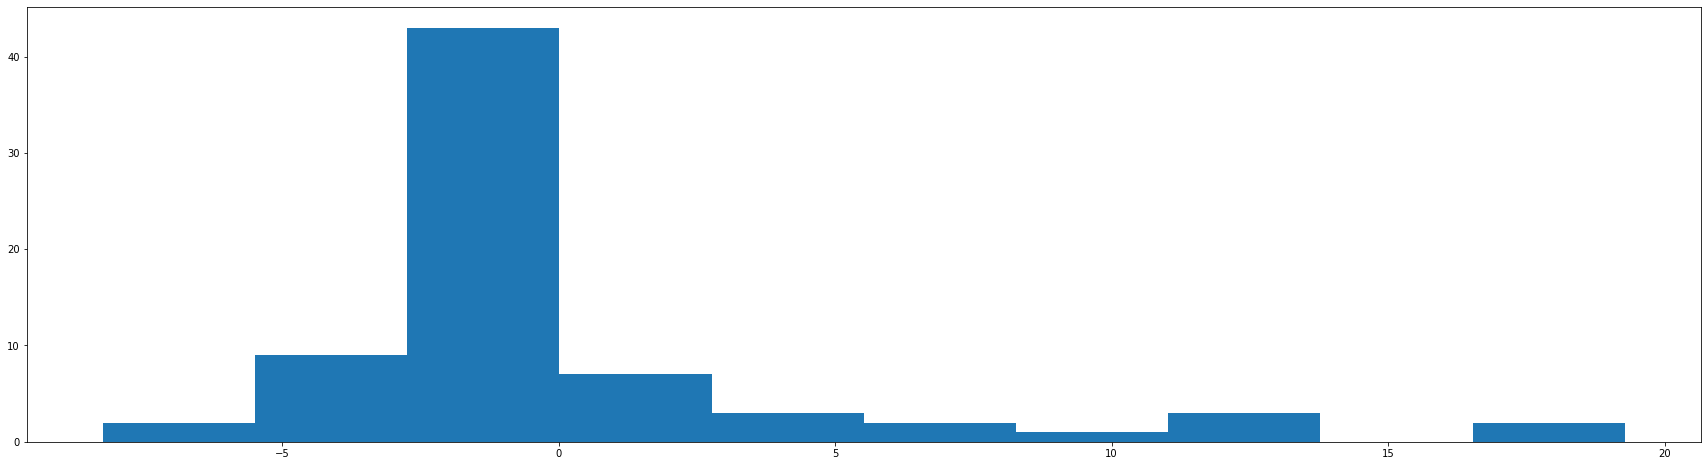

In [24]:
fig, ax = plt.subplots(figsize=(30, 8))
_ = ax.hist(transaction_df['profit_percent'], bins=10)